<div align="center">
<h1>Lista 05 - SVM e comitês de modelos</h1>

<h3>Aprendizagem de Máquina (CK0193)</h3>
<b>Aluna:</b> Samyra Vitória Lima de Almeida <b>Matrícula:</b> 521240 <br>
<b>Email:</b> samyraalmeida@alu.ufc.br <br>
</div>

<br>

### Questão 1

**a)**
    **i. SVM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos
import random
data = np.genfromtxt('./californiabin.csv', delimiter=',')


In [63]:
from sklearn.svm import SVC # Import Support Vector Machine
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, auc, precision_recall_curve

In [64]:
# Separa e normaliza o dataset
n_columns = data.shape[1]
np.random.permutation(data)

X = data[:, 0 : (n_columns - 1)] # np.c_[np.ones((n,1)),data[:, [0, n - 1]]]
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

y = data[:, [n_columns - 1]]
y = y.reshape(y.shape[1], y.shape[0])[0]

# Build hiperparameters lists
gamma_list = [2 ** i for i in range(-15, 2, 2)] + [2 ** i for i in [2, 3]]
C_list = [2 ** i for i in range(-5, 16, 2)]

param_grid = dict(gamma=gamma_list, C=C_list)

In [65]:
# Calcula os melhores hiperparametros para o modelo SVM 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

cross_val_scores = []

for C in C_list:
    for gamma in gamma_list:
        clf = SVC(C=C, kernel="rbf", gamma=gamma)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        cross_val_scores.append([np.mean(scores), C, gamma])
        
        # print(
        #     "C: %.5f gamma: %.5f score: %0.5f"
        #     % (C, gamma, np.mean(scores))
        # )

best_index = np.argmax(cross_val_scores, axis=0)[0]
print("Melhor score do cross-validation: {:.3f}".format(cross_val_scores[best_index][0]))
best_C, best_gamma = cross_val_scores[best_index][1], cross_val_scores[best_index][2]
print("Melhores hiperparametros são C = %.5f e gama = %.5f" % (best_C, best_gamma))

Melhor score do cross-validation: 0.842
Melhores hiperparametros são C = 32768.00000 e gama = 0.12500


In [68]:
# Treino o modelo SVM
model = SVC(C=best_C, gamma=best_gamma, probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("METRICAS\n")
print("Acurácia", accuracy_score(y_test, y_pred))
print("Revocação", recall_score(y_test, y_pred))
print("Precisão", precision_score(y_test, y_pred))
print("F1-score", f1_score(y_test, y_pred))

METRICAS

Acurácia 0.8311111111111111
Revocação 0.8171806167400881
Precisão 0.8431818181818181
F1-score 0.8299776286353469


No Skill: ROC AUC=0.500
SVM: ROC AUC=0.909


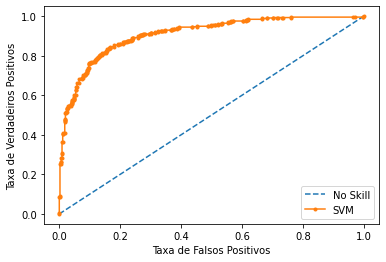

In [69]:
ns_probs = [0 for _ in range(len(y_test))]
svm_probs = model.predict_proba(X_test)

svm_probs = svm_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))

# Calcula a curva roc
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# Plota a curva
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

# show the legend
plt.legend()
# show the plot
plt.show()

SVM: auc 0.914


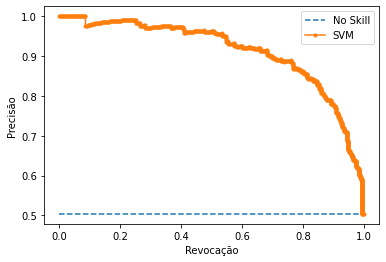

In [72]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test, y_pred), auc(svm_recall, svm_precision)

print("SVM: auc %.3f" % (svm_auc))

no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
plt.xlabel('Revocação')
plt.ylabel('Precisão')

# show the legend
plt.legend()
# show the plot
plt.show()